### Importing Libraries and DataFrame

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing dataframe
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

### Exploratory Data Analysis (EDA)

In [4]:
from sklearn.preprocessing import StandardScaler
indices = ['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

In [49]:
print(df.head())
print(df.dtypes)
print(df.shape, df.size)
print(df.info())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1   0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2  -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3   0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4  -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   

   Research  Chance of Admit   
0  0.886405              0.92  
1  0.886405              0.76  
2  0.886405              0.72  
3  0.886405              0.80  
4 -1.128152              0.65  
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object
(500, 8) 4000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data co

### Data Preprocessing

In [50]:
# scaling the data
s = StandardScaler()
df[indices] = s.fit_transform(df[indices])
print(df.head())

   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0   1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1   0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2  -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3   0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4  -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   

   Research  Chance of Admit   
0  0.886405              0.92  
1  0.886405              0.76  
2  0.886405              0.72  
3  0.886405              0.80  
4 -1.128152              0.65  


In [7]:
# Here the serial no. column does not convey any information to our prediction
# Hence dropping the column Serial No.
df.drop('Serial No.', inplace=True, axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,0.65


In [8]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### 1. Multiple Linear Regressor (MLR)

In [9]:
# There are no null values
# extracting x and y
m_x = df[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
m_y = df['Chance of Admit '].values

In [10]:
# splitting into training and test set
from sklearn.model_selection import train_test_split
m_x_tr, m_x_te, m_y_tr, m_y_te = train_test_split(
    m_x, m_y, test_size=0.2, random_state=200)

In [11]:
# create and train the linear regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(m_x_tr, m_y_tr)

LinearRegression()

In [12]:
# predicting the values and calculating the errors and r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
m_y_pred = mlr.predict(m_x_te)
print('y_pred=', m_y_pred)
print('-------------------------------------------------------------------------')
print('y_test=', m_y_te)

y_pred= [0.61635829 0.6581441  0.61691753 0.67556453 0.8777813  0.64813872
 0.72430047 0.55877053 0.85833797 0.67751625 0.50403132 0.5343963
 0.81868237 0.62676102 0.83312043 0.84194681 0.86405488 0.64339323
 0.78656554 0.52123244 0.7801137  0.64818079 0.43440208 0.58838702
 0.77698304 0.70987474 0.98904045 0.64096681 0.71325841 0.67285907
 0.72042278 0.58297502 0.71589664 0.90688696 0.7827935  0.52935114
 0.73252579 0.67905142 0.8860504  0.66576021 0.80651754 0.91644383
 0.58993084 0.69869614 0.70151575 0.68632921 0.58346429 0.62864324
 0.47520817 0.71338119 0.65230253 0.91257457 0.79931783 0.96266307
 0.82514242 0.59431637 0.84317079 0.5283786  0.63140817 0.67865673
 0.775827   0.55523531 0.92885264 0.61523345 0.70716172 0.79876444
 0.56026548 0.75760246 0.53610709 0.75184008 0.85469884 0.77916489
 0.89610261 0.62031613 0.84434012 0.70330075 0.75091788 0.7910068
 0.58220602 0.91069514 0.51333192 0.62060992 0.83527603 0.70260578
 0.75434989 0.78498029 0.58457916 0.61508309 0.5310402  

In [13]:
# error analysis
mae = mean_absolute_error(m_y_te, m_y_pred)
mse = mean_squared_error(m_y_te, m_y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(m_y_te, m_y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
lst_mae=[mae]
lst_mse = [mse]
lst_rmse = [rmse]
lst_r2_Score = [r2]

0.045345339216522514
0.0036097956465169444
0.0600815749337261
0.8082526339390302


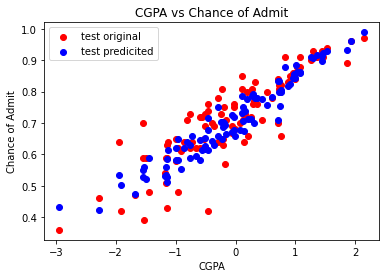

In [14]:
# visualizing the test output
# first pair - CGPA and Chance of Admit
plt.scatter(m_x_te['CGPA'], m_y_te, c='red', label='test original')
plt.scatter(m_x_te['CGPA'], m_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')
plt.show()

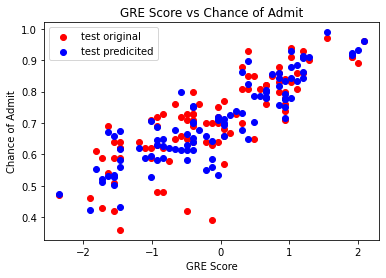

In [15]:
# visualizing the test output
# Second pair - GRE Score and Chance of Admit
plt.scatter(m_x_te['GRE Score'], m_y_te, c='red', label='test original')
plt.scatter(m_x_te['GRE Score'], m_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.show()

### 2. Random Forest.

In [16]:
# spliting data into x and y according to indices.
index = ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP']
r_x = df[index]
r_y = df['Chance of Admit ']

In [17]:
# splitting data into training and testing
r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(
    r_x, r_y, test_size=0.2, random_state=100)

In [18]:
# create and train the Random forest model
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=200, random_state=0)
reg.fit(r_x_train, r_y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [19]:
# predicting the values and calculating the errors and r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r_y_pred = reg.predict(r_x_test)
print('y_pred=', r_y_pred)
print('-------------------------------------------------------------------------')
print('y_test=', r_y_test.values)

y_pred= [0.87035 0.539   0.5971  0.459   0.6742  0.84705 0.5635  0.6231  0.82975
 0.6771  0.64425 0.55765 0.9159  0.7472  0.6449  0.5213  0.60475 0.72005
 0.5849  0.63285 0.9043  0.677   0.8193  0.84235 0.9673  0.64235 0.71945
 0.9358  0.8914  0.6265  0.7823  0.8131  0.7053  0.616   0.783   0.7599
 0.79875 0.54905 0.5449  0.68    0.9362  0.53915 0.8462  0.8065  0.81585
 0.5093  0.61135 0.8362  0.92625 0.63295 0.79605 0.70315 0.8153  0.96235
 0.63915 0.89025 0.63705 0.91715 0.7151  0.71135 0.70505 0.6693  0.46935
 0.9133  0.61275 0.7207  0.66495 0.4597  0.861   0.85775 0.92015 0.7162
 0.7106  0.8851  0.65645 0.74645 0.53085 0.779   0.91495 0.93325 0.66005
 0.6332  0.90315 0.6257  0.88255 0.7918  0.64285 0.5734  0.7104  0.62805
 0.64205 0.6397  0.6571  0.938   0.92615 0.73555 0.825   0.7369  0.5665
 0.82975]
-------------------------------------------------------------------------
y_test= [0.78 0.54 0.64 0.47 0.7  0.88 0.57 0.72 0.84 0.64 0.79 0.56 0.92 0.79
 0.73 0.52 0.62 0.81 0.57 0.6

In [20]:
# error calculation
r_mae = mean_absolute_error(r_y_pred, r_y_test)
r_mse = mean_squared_error(r_y_pred, r_y_test)
r_rmse = np.sqrt(mse)
r_r2 = r2_score(r_y_pred, r_y_test)
lst_mae.append(r_mae)
lst_mse.append(r_mse)
lst_rmse.append(r_rmse)
lst_r2_Score.append(r_r2)
print("mean average error : ", r_mae)
print("mean square error : ", r_mse)
print("root mean square error : ", r_rmse)
print("r2_score : ", r_r2)

mean average error :  0.044429000000000024
mean square error :  0.004005060850000012
root mean square error :  0.0600815749337261
r2_score :  0.7702736216843601


In [21]:
r_feature = pd.Series(reg.feature_importances_, index=index)
print(r_feature)

GRE Score      0.089323
TOEFL Score    0.050293
CGPA           0.826649
SOP            0.033735
dtype: float64


No handles with labels found to put in legend.


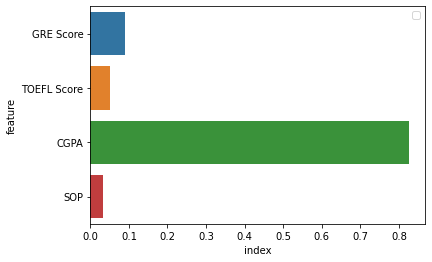

In [22]:
# importing seaborn to display data
import seaborn as sns
sns.barplot(x=r_feature, y=index)

# add labels
plt.legend()
plt.xlabel('index')
plt.ylabel('feature')
plt.show()

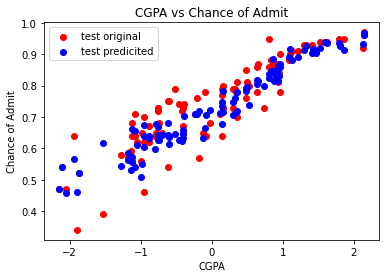

In [23]:
# visualizing the test output
# first pair - CGPA and Chance of Admit
plt.scatter(r_x_test["CGPA"], r_y_test, c='red', label='test original')
plt.scatter(r_x_test["CGPA"], r_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')
plt.show()

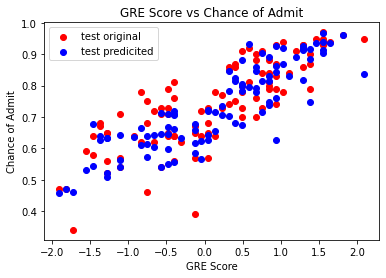

In [24]:
# visualizing the test output
# Second pair - GRE Score and Chance of Admit
plt.scatter(r_x_test['GRE Score'], r_y_test, c='red', label='test original')
plt.scatter(r_x_test['GRE Score'], r_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.show()

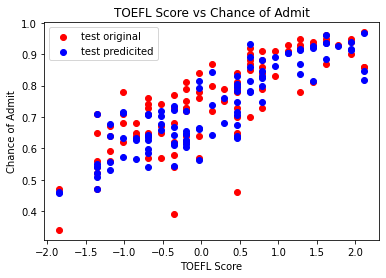

In [25]:
# visualizing the test output
# Third pair - TOEFL Score and Chance of Admit
plt.scatter(r_x_test['TOEFL Score'], r_y_test, c='red', label='test original')
plt.scatter(r_x_test['TOEFL Score'], r_y_pred,
            c='blue', label='test predicited')
plt.legend()
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

### PCA for MLR

In [26]:
from sklearn.decomposition import PCA
m_p_column = ['pc1', 'pc2', 'pc3']
# applying the pca
m_p_pca = PCA(n_components=len(m_p_column))

# getting data into principle components
m_p_principlecomp = m_p_pca.fit_transform(df[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA','Research']])

m_p_principlecompdf = pd.DataFrame(data=m_p_principlecomp, columns=m_p_column)
print(m_p_principlecompdf)

          pc1       pc2       pc3
0   -3.568375 -0.328318 -0.608675
1   -1.639199  0.034550  0.867234
2    0.550991 -0.720794  0.940014
3   -0.345470 -1.280237 -0.390081
4    2.035804  0.039366 -0.691749
..        ...       ...       ...
495 -2.438060 -0.020361  0.392035
496 -4.373303  0.306942 -0.200463
497 -3.910724  0.256798 -0.167086
498 -0.245327  2.135250  0.802122
499 -1.873791  1.515791 -0.845650

[500 rows x 3 columns]


In [27]:
# final data with principle component data
m_p_finaldf = pd.concat(
    [m_p_principlecompdf, df[['Chance of Admit ']]], axis=1)

print(m_p_finaldf.head())

        pc1       pc2       pc3  Chance of Admit 
0 -3.568375 -0.328318 -0.608675              0.92
1 -1.639199  0.034550  0.867234              0.76
2  0.550991 -0.720794  0.940014              0.72
3 -0.345470 -1.280237 -0.390081              0.80
4  2.035804  0.039366 -0.691749              0.65


In [28]:
# principle component with p<0.05 has been removed
m_p_pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255])

### 3. Multiple Linear Regressor (MLR) with PCA

In [29]:
# spliting the data into trining and testing data
from sklearn.model_selection import train_test_split

m_p_x_train, m_p_x_test, m_p_y_train, m_p_y_test = train_test_split(
    m_p_finaldf.iloc[:, :-1].values, m_p_finaldf.iloc[:, -1].values, train_size=0.8, random_state=0)

In [30]:
# create and train the linear regression model
from sklearn.linear_model import LinearRegression
mlr_pca = LinearRegression()
mlr_pca.fit(m_p_x_train, m_p_y_train)

LinearRegression()

In [31]:
# predicting the values and calculating the errors and r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
m_p_y_pred = mlr_pca.predict(m_p_x_test)
print('y_pred=', m_p_y_pred)
print('-------------------------------------------------------------------------')
print('y_test=', m_p_y_test)

y_pred= [0.69711743 0.81965476 0.75961497 0.90026078 0.60964072 0.66447488
 0.52243942 0.69435892 0.49986141 0.72026209 0.6171625  0.70793262
 0.60417184 0.73406297 0.90863937 0.50676138 0.82032913 0.63773434
 0.74340399 0.52140588 0.52016894 0.72502894 0.51851292 0.93138172
 0.85142546 0.70092012 0.75058637 0.50445299 0.58148137 0.57561494
 0.65833686 0.51877432 0.64553494 0.84147211 0.5947748  0.61592535
 0.83680691 0.85998839 0.60306083 0.63573784 0.65495925 0.89457551
 0.87350372 0.72337476 0.78169398 0.80203102 0.96685023 0.83800727
 0.6504796  0.66917106 0.60586835 0.62942883 0.59703441 0.77591955
 0.7052825  0.85047629 0.5308443  0.8477847  0.60603735 0.64641148
 0.52283649 0.90841274 0.60332271 0.88844414 0.68776431 0.61517246
 0.74759049 0.8483977  0.49900457 0.76676591 0.8974318  0.78784618
 0.70079298 0.69105844 0.81040209 0.93033328 0.74615195 0.74233105
 0.57952679 0.63464692 0.60812646 0.86569059 0.58406071 0.66905359
 0.79253487 0.55243127 0.79034572 0.60151637 0.4863340

In [32]:
# error calculation
m_p_mae = mean_absolute_error(m_p_y_pred, m_p_y_test)
m_p_mse = mean_squared_error(m_p_y_pred, m_p_y_test)
m_p_rmse = np.sqrt(m_p_mse)
m_p_r2_Score = r2_score(m_p_y_pred, m_p_y_test)
lst_mae.append(m_p_mae)
lst_mse.append(m_p_mse)
lst_rmse.append(m_p_rmse)
lst_r2_Score.append(m_p_r2_Score)
print(m_p_mae)
print(m_p_mse)
print(m_p_rmse)
print(m_p_r2_Score)

0.05088574657875699
0.004431258149176575
0.06656769598819366
0.7104046226612685


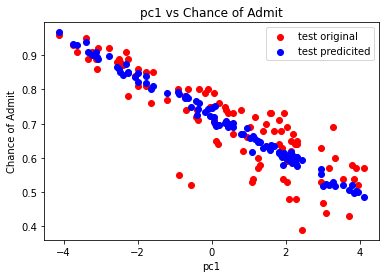

In [33]:
# visualizing the test output
# first pair - pc1 and Chance of Admit
plt.scatter(m_p_x_test[:, 0], m_p_y_test, c='red', label='test original')
plt.scatter(m_p_x_test[:, 0], m_p_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('pc1')
plt.ylabel('Chance of Admit')
plt.title('pc1 vs Chance of Admit')
plt.show()

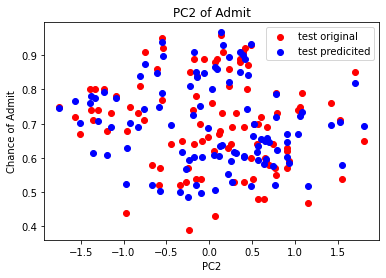

In [34]:
# visualizing the test output
# Second pair - pc2 and Chance of Admit
plt.scatter(m_p_x_test[:, 1], m_p_y_test, c='red', label='test original')
plt.scatter(m_p_x_test[:, 1], m_p_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('PC2')
plt.ylabel('Chance of Admit')
plt.title('PC2 of Admit')
plt.show()

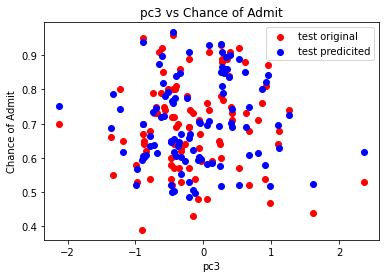

In [35]:
# visualizing the test output
# first pair - pc3 and Chance of Admit
plt.scatter(m_p_x_test[:, 2], m_p_y_test, c='red', label='test original')
plt.scatter(m_p_x_test[:, 2], m_p_y_pred, c='blue', label='test predicited')
plt.legend()
plt.xlabel('pc3')
plt.ylabel('Chance of Admit')
plt.title('pc3 vs Chance of Admit')
plt.show()

### PCA for Random Forest

In [36]:
from sklearn.decomposition import PCA
r_p_column = ['pc1', 'pc2', 'pc3']
# applying the pca
r_p_pca = PCA(n_components=len(r_p_column))

# getting data into principle components
r_p_principlecomp = r_p_pca.fit_transform(
    df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']])

r_p_principlecompdf = pd.DataFrame(data=r_p_principlecomp, columns=r_p_column)
print(r_p_principlecompdf)

          pc1       pc2       pc3
0   -3.454599  0.715382 -0.487942
1   -1.446694 -0.673291 -0.170767
2    0.843259 -0.282614 -0.031818
3   -0.087246  1.083174  0.552358
4    1.792237  0.532216 -0.570909
..        ...       ...       ...
495 -2.277863 -0.274925  0.769505
496 -4.299979  0.002730 -0.146817
497 -3.819647 -0.008982 -0.211314
498 -0.607661 -1.933850 -0.230173
499 -2.298916 -0.257542 -0.165467

[500 rows x 3 columns]


In [37]:
# final data with principle component data
r_p_finaldf = pd.concat(
    [r_p_principlecompdf, df[['Chance of Admit ']]], axis=1)

print(r_p_finaldf.head())

        pc1       pc2       pc3  Chance of Admit 
0 -3.454599  0.715382 -0.487942              0.92
1 -1.446694 -0.673291 -0.170767              0.76
2  0.843259 -0.282614 -0.031818              0.72
3 -0.087246  1.083174  0.552358              0.80
4  1.792237  0.532216 -0.570909              0.65


In [38]:
# principle component with p<0.05 has been removed
r_p_pca.explained_variance_ratio_

array([0.73129063, 0.10519804, 0.06363789])

### 4. Random Forest using PCA

In [39]:
# spliting the data into trining and testing data
from sklearn.model_selection import train_test_split

r_p_x_train, r_p_x_test, r_p_y_train, r_p_y_test = train_test_split(
    r_p_finaldf.iloc[:, :-1].values, r_p_finaldf.iloc[:, -1].values, train_size=0.8, random_state=0)

In [40]:
# traning the model and predicting the output of testing dataset
r_p_reg = RandomForestRegressor(n_estimators=200, random_state=199)

r_p_reg.fit(r_p_x_train, r_p_y_train)

# predicting the output
r_p_y_pred = r_p_reg.predict(r_p_x_test)

No handles with labels found to put in legend.


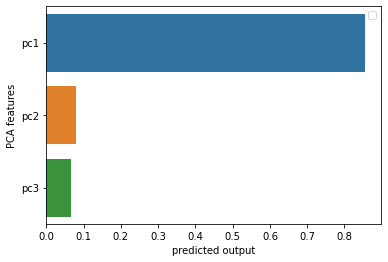

In [41]:
# graphical analysis
r_p_features = pd.Series(r_p_reg.feature_importances_, index=r_p_column)
sns.barplot(x=r_p_features, y=r_p_column)
plt.legend()
plt.xlabel('predicted output')
plt.ylabel('PCA features')
plt.show()

In [42]:
# finding the errors of the model
r_p_mae = mean_absolute_error(r_p_y_test, r_p_y_pred)
r_p_mse = mean_squared_error(r_p_y_test, r_p_y_pred)
r_p_rmse = np.sqrt(r_p_mse)
r_p_r2_score = r2_score(r_p_y_test, r_p_y_pred)
lst_mae.append(r_p_mae)
lst_mse.append(r_p_mse)
lst_rmse.append(r_p_rmse)
lst_r2_Score.append(r_p_r2_score)
print('mean absolute error :', r_p_mae)
print('mean square error :', r_p_mse)
print('root mean square error :', r_p_rmse)
print('r2_score :', r_p_r2_score)

mean absolute error : 0.05099800000000003
mean square error : 0.005034446150000006
root mean square error : 0.07095383111573332
r2_score : 0.7117367182467538


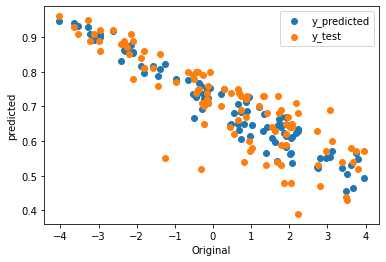

In [43]:
plt.scatter(r_p_x_test[:, 0], r_p_y_pred, label='y_predicted')
plt.scatter(r_p_x_test[:, 0], r_p_y_test, label='y_test')
plt.legend()
plt.xlabel('Original')
plt.ylabel('predicted')
plt.show()

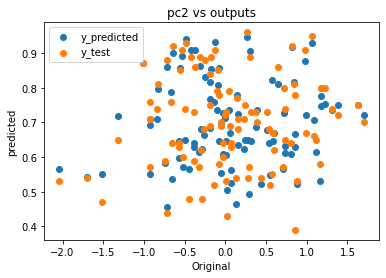

In [44]:
plt.title('pc2 vs outputs')
plt.scatter(r_p_x_test[:, 1], r_p_y_pred, label='y_predicted')
plt.scatter(r_p_x_test[:, 1], r_p_y_test, label='y_test')
plt.legend()
plt.xlabel('Original')
plt.ylabel('predicted')
plt.show()

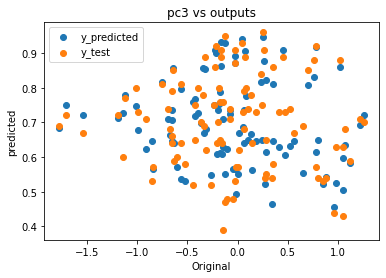

In [45]:
plt.title('pc3 vs outputs')
plt.scatter(r_p_x_test[:, 2], r_p_y_pred, label='y_predicted')
plt.scatter(r_p_x_test[:, 2], r_p_y_test, label='y_test')
plt.legend()
plt.xlabel('Original')
plt.ylabel('predicted')
plt.show()

### Conclusion

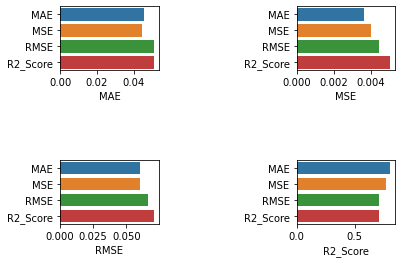

In [47]:
# graphical analysis
lst_indices = ['MAE', 'MSE', 'RMSE', 'R2_Score']
r_p_features_mae = pd.Series(lst_mae, index=lst_indices)
r_p_features_mse = pd.Series(lst_mse, index=lst_indices)
r_p_features_rmse = pd.Series(lst_rmse, index=lst_indices)
r_p_features_r2_score = pd.Series(lst_r2_Score, index=lst_indices)


plt.subplot(3, 3, 1)
sns.barplot(x=r_p_features_mae, y=lst_indices)
plt.xlabel('MAE')

plt.subplot(3, 3, 3)
sns.barplot(x=r_p_features_mse, y=lst_indices)
plt.xlabel('MSE')

plt.subplot(3, 3, 7)
sns.barplot(x=r_p_features_rmse, y=lst_indices)
plt.xlabel('RMSE')

plt.subplot(3, 3, 9)
sns.barplot(x=r_p_features_r2_score, y=lst_indices)
plt.xlabel('R2_Score')

plt.show()